In [1]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
import mkipp
%matplotlib inline

# Massive stars - episode I
So far, we considered stars that burnt hydrogen and helium in their cores, and that thus end their lives as CO white dwarfs. This is roughly the case for all stars initially less massive than $\approx\,8\,\mathrm{M}_\odot$. Now, we will consider stars that are massive enough to also ignite carbon and oxygen. In particular, we consider stars where the core material is burnt into iron group elements (initial masses $\gtrsim\,10\text{--}12\,\mathrm{M}_\odot$, depending on core overshooting; see below). No energy can be extracted from fusing iron nuclei (see graph below) and, at this point, the stellar core will collapse and the star may explode in a core-collapse supernova (CCSN; more on this in a dedicated lecture). In the intermediate mass range from $\approx\,8\,\mathrm{M}_\odot$ to $10\text{--}12\,\mathrm{M}_\odot$, stars ignite carbon under degenerate conditions (carbon flash) and may either form oxygen-neon-magnesium white dwarfs or explode in so-called electron-capture supernovae (ECSN) leaving a neutron star behind. We will not cover such super-AGB stars in this lab.

<img src="Binding_energy_curve_-_common_isotopes.svg" alt="Binding energy of nuclei" width="700"/>

Before we look into the late-burning stages of massive stars, we consider two key physical ingredients that are crucial for massive stars: **convective boundary mixing**, in particular *convective core overshooting*, and **wind mass-loss**.

## Convective core overshooting
When convective bubbles rise to the boundary layer where convection is supposed to stop, additional mixing across the boundary may occur. The exact reason for this is still under investigation. In this lecture, it suffices to know that convective eddies may overshoot into regions that are stable against convection and thereby lead to mixing of chemical elements between the convective core and the radiative outer layers. To provide some intuition, consider the following simulation of core convection due to hydrogen burning in a $25\,\mathrm{M}_\odot$ star (see https://www.youtube.com/watch?v=B-L2c4l5F7M for the original movie).

In [3]:
from IPython.display import HTML

HTML("""
    <video alt="Core convection in 25 Msun star" width="700" controls>
        <source src="core-convection.mp4" type="video/mp4">
    </video>
""")

In stellar evolution codes, this extra mixing between convective core and radiative envelope is either parametrised by an overshooting layer of certain size (so-called step overshooting) or an exponentially declining mixing efficiency beyond the convective core (so-called exponential overshooting). Here, we will consider the latter.

Exponential convective overshooting is usually written in the form of an exponentially declining mixing coefficient $D_\mathrm{ov}$,
\begin{align}
D_\mathrm{ov} = D_0 \exp \left[ -\frac{2\Delta r}{f_\mathrm{ov} H_P} \right].
\end{align}
The decline is exponential in the distance to the convective boundary, $\Delta r$, and the decay length is given by the local pressure scale height, $H_P=P/\rho g$ ($g$ being the local gravitational acceleration), at the convective boundary. The reference point of the mixing coefficient, $D_0$ is measured just inside the convective core. For the more technically interested: diffusive mixing is assumed and $D_\mathrm{ov}$ serves as the diffusion coefficient. The diffusion equation is then solved alongside the stellar structure equations.

To understand the effects of convective core overshooting in main-sequence stars, we compute the core-hydrogen-burning phase of a $25\,\mathrm{M}_\odot$ star for three cases: no overshooting, moderate overshooting with $f_\mathrm{ov}=0.01$ and large overshooting with $f_\mathrm{ov}=0.04$.

#### Problem 1:
Use the provided MESA skeleton to compute the three models mentioned above. Make sure that the MESA output (`log_directory`) is in separate folders. We suggest to use the following naming convention: 'LOGS_25M_fov-0.000', 'LOGS_25M_fov-0.010' and 'LOGS_25M_fov-0.040'. In MESA, the controls `overshoot_f_above_burn_h_core`, `overshoot_f_above_burn_h_shell` and `overshoot_f_below_burn_h_shell` control overshooting related to hydrogen burning either in the core or in shells. If you have difficulties computing these models, you can also download the results [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/25M_ms_overshooting.tar.gz).

With these models, we first inspect the HR diagram:

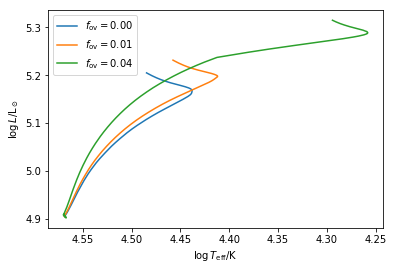

In [2]:
log_25M_fov_00 = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.000')
log_25M_fov_10 = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.010')
log_25M_fov_40 = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.040')

plt.plot(log_25M_fov_00.history.log_Teff, log_25M_fov_00.history.log_L, label=r'$f_\mathrm{ov}=0.00$')
plt.plot(log_25M_fov_10.history.log_Teff, log_25M_fov_10.history.log_L, label=r'$f_\mathrm{ov}=0.01$')
plt.plot(log_25M_fov_40.history.log_Teff, log_25M_fov_40.history.log_L, label=r'$f_\mathrm{ov}=0.04$')

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.gca().invert_xaxis()

plt.legend()

We can see that stars are cooler, larger and more luminous at the end of core hydrogen burning for larger overshooting. The differences can be substantial, which exemplifies how important knowledge on core overshooting is.

In the following, we wish to better understand why the models are so different. To this end, we compare the Kippenhahn diagrams of the moderate and large overshooting models. Overshooting regions are displayed by purple cross hatchings.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.010 ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.010']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones
/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.040 ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.040']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(528.359,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

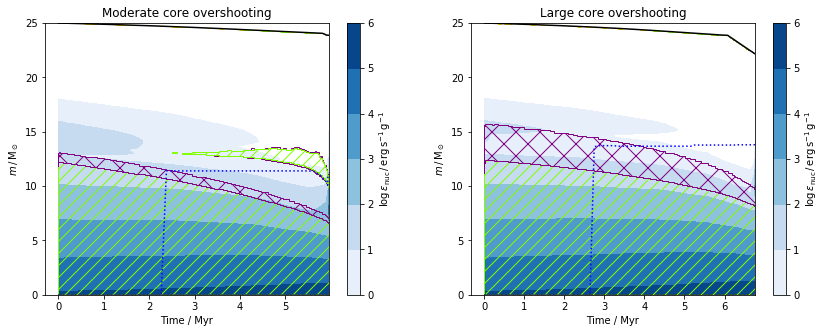

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# moderate overshooting model
ax1.set_title('Moderate core overshooting')

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.010'],
                                            xaxis = 'star_age',
                                            show_semi = False,
                                            decorate_plot = False), axis=ax1)

cbar1 = plt.colorbar(kipp_plot.contour_plot, pad=0.05, ax=ax1)
cbar1.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

ax1.set_ylim(0,25)

ax1.set_xlabel('Time / Myr')
ax1.set_ylabel(r'$m\,/\,\mathrm{M}_\odot$')


# large overshooting model
ax2.set_title('Large core overshooting')

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/25M/25M_ms_overshooting/LOGS_25M_fov-0.040'],
                                            xaxis = 'star_age',
                                            show_semi = False,
                                            decorate_plot = False), axis=ax2)

cbar2 = plt.colorbar(kipp_plot.contour_plot, pad=0.05, ax=ax2)
cbar2.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

ax2.set_ylim(0,25)

ax2.set_xlabel('Time / Myr')
ax2.set_ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Problem 2:
1. From the Kippenhahn diagrams, read off the sizes (in mass) of the convective core and the overshooting layer at the zero-age and termial-age main-sequence.
2. How big is the helium core at the TAMS? *Hint:* Use the `he_core_mass` in the history output or simply read off rough numbers from the Kippenhahn diagrams.
3. So, why are models with more overshooting cooler and brighter at the TAMS? *Hint:* Think about the homology relations we derived earlier.

Stars with more overshooting are not only brighter and cooler throughout their MS evolution but they also have more nuclear fuel available and therefore live longer. For our above examples, we find MS lifetimes of:

In [6]:
print('MS lifetime, f_ov=0.00: %.1f Myr,' % (log_25M_fov_00.history.star_age[-1]/1e6))
print('MS lifetime, f_ov=0.01: %.1f Myr and' % (log_25M_fov_10.history.star_age[-1]/1e6))
print('MS lifetime, f_ov=0.04: %.1f Myr.' % (log_25M_fov_40.history.star_age[-1]/1e6))

MS lifetime, f_ov=0.00: 5.7 Myr,
MS lifetime, f_ov=0.01: 6.0 Myr and
MS lifetime, f_ov=0.04: 6.8 Myr.


At the TAMS, independent on overshooting, all three models have a core mass $M_\mathrm{c}$ such that $M_\mathrm{c}/M>0.13$, i.e. these massive cores cannot maintain an isothermal temperature profile and will therefore contract on a thermal timescale (cf. Schönberg-Chandrasekhar limit). Massive stars are thus expected to show a prominent Hertzsprung gap in the HR diagram as they should rush over the HR diagram to become red supergiants (note difference to red-giant-branch star). However, observations show that there are actually many blue supergiants in a region where the Hertzsprung gap is expected to be. This is also known as the blue-supergiant problem and a resolution of this problem is still pending...

## Mass loss of massive stars

Observationally, it is known that massive stars have strong stellar winds and loose mass with a significant rate. Studying the reasons for this mass loss is a whole lecture on its own, but it is thought that (partially ionized) atoms in the photosphere absorb photons and thereby gain linear momentum. The so accelerated atoms (mostly iron group elements because of their many atomic transitions) drag other atoms with it. Ultimately, this then results in a so-called **line-driven wind**.  

To further illustrate the importance of mass loss for massive stars, we consider a simple model. Massive stars on the main-sequence roughly follow the mass-luminosity relation,
\begin{align}
\log \frac{L}{\mathrm{L}_\odot} = 0.781 + 2.760\times\log \frac{M_\mathrm{ini}}{\mathrm{M}_\odot}.
\end{align}
Mass-loss on the main-sequence scales roughly as
\begin{align}
\log \frac{\dot{M}}{\mathrm{M}_\odot\,\mathrm{yr}^{-1}} = -12.76 + 1.3\times\log \frac{L}{\mathrm{L}_\odot}
\end{align}
and the main-sequence lifetime of massive stars is
\begin{align}
\log \frac{\tau_\mathrm{MS}}{\mathrm{Myr}} = 7.719 - 0.655\times\log \frac{M_\mathrm{ini}}{\mathrm{M}_\odot}.
\end{align}

This then gives the following mass-loss on the main-sequence:

[ 25  40  60  85 120]
[  1.18702002   4.71131296  15.47453535  42.98190987 118.17853302]
[0.0474808  0.11778282 0.25790892 0.50566953 0.98482111]


Text(0,0.5,'Mass loss on MS / M$_\\odot$')

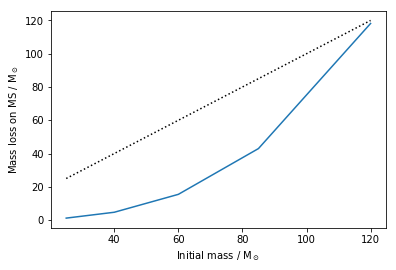

In [4]:
M = np.array([25,40,60,85,120])

logM = np.log10(M)
logL = 0.781+2.760*logM
Mdot = np.power(10, -12.76+1.3*logL)
tau_ms = np.power(10, 7.719 - 0.655*logM)
dM = Mdot*tau_ms

print(M)
print(dM)
print(dM/M)

plt.plot(M, dM)
plt.plot(M, M, 'k:')

plt.xlabel('Initial mass / M$_\odot$')
plt.ylabel('Mass loss on MS / M$_\odot$')

So **massive stars can loose a significant fraction of their total mass** already on the main-sequence (we can also see an obvious shortcoming of the simple model: stars will never lose their total mass - why and where is the flaw in the above estimate?). Compared to our $25\,\mathrm{M}_\odot$ model, the approximate mass-loss model for main-sequence stars is in general agreement (about $1.2\,\mathrm{M}_\odot$ for a $25\,\mathrm{M}_\odot$ star):

In [5]:
print('Mass loss for f_ov=0.00: %.2f Msun' % (25.0-log_25M_fov_00.history.star_mass[-1]))
print('Mass loss for f_ov=0.10: %.2f Msun' % (25.0-log_25M_fov_10.history.star_mass[-1]))
print('Mass loss for f_ov=0.40: %.2f Msun' % (25.0-log_25M_fov_40.history.star_mass[-1]))

Mass loss for f_ov=0.00: 0.89 Msun
Mass loss for f_ov=0.10: 1.13 Msun
Mass loss for f_ov=0.40: 2.83 Msun


We can also see the importance of overshooting again: with more overshooting, stars are more luminous *and* live longer, so can loose more mass already on the main-sequence.

The exact mass-loss of massive stars is still a major uncertainty and many researcher are working on it to better understand it. A recent overview of different modes of mass-loss in massive stars is from the review by N. Smith 2014, ARAA, 52, 487:

<img src="massive-star-mass-loss.png" alt="Massive star mass-loss" width="500"/>

This overview considers not only line-driven winds but also eruptive forms of mass-loss from e.g. luminous blue variables and also mass-loss in binary stars. In the MESA models that you are computing, you use the prescriptions of Vink et al. for hot massive stars (e.g. main-sequence stars), de Jager et al. for cool massive stars (e.g. red supergiants) and the Nugis & Lamers rates for so-called Wolf-Rayet stars that we will consider next. In MESA, this option is called the 'Dutch' wind mass-loss prescription because the above key authors are all Dutch.

## Wolf-Rayet stars
In the above estimate, we already saw that a $60\,\mathrm{M}_\odot$ star may loose $15\,\mathrm{M}_\odot$, i.e. one quarter of its initial mass, during its main-sequence evolution. We will now check what such immense mass-loss does to the evolution of an initially $60\,\mathrm{M}_\odot$ star.

If you have not run the corresponding MESA model yet, you can download the output [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/60M_to_core_he_exhaustion.tar.gz).

We start by plotting the HR diagram alongside the mass evolution of the model.

Text(0,0.5,'Total mass / M$_\\odot$')

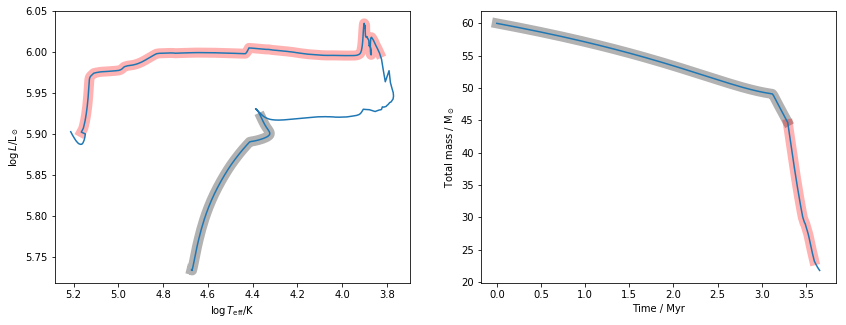

In [6]:
log_60M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/60M/LOGS_60M')

ms_mask = log_60M.history.center_h1 > 1e-5
he_mask = log_60M.history.surface_he4 > 0.4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))


# HR diagram
ax1.plot(log_60M.history.log_Teff[ms_mask], log_60M.history.log_L[ms_mask], lw=10, c='k', alpha=0.3)
ax1.plot(log_60M.history.log_Teff[he_mask], log_60M.history.log_L[he_mask], lw=10, c='r', alpha=0.3)
ax1.plot(log_60M.history.log_Teff, log_60M.history.log_L)

ax1.set_xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
ax1.set_ylabel(r'$\log\,L/\mathrm{L}_\odot$')

ax1.invert_xaxis()


# mass evolution
ax2.plot(log_60M.history.star_age[ms_mask]/1e6, log_60M.history.star_mass[ms_mask], lw=10, c='k', alpha=0.3)
ax2.plot(log_60M.history.star_age[he_mask]/1e6, log_60M.history.star_mass[he_mask], lw=10, c='r', alpha=0.3)
ax2.plot(log_60M.history.star_age/1e6, log_60M.history.star_mass)

ax2.set_xlabel('Time / Myr')
ax2.set_ylabel(r'Total mass / M$_\odot$')

#### Problem 3:
1. How much mass has the star lost during the main-sequence evolution? How does this compare to our simple estimate from above?
2. How much mass has the star lost as a post-MS star? So in which phase has the star lost more mass?

Because of the large mass loss, the $60\,\mathrm{M}_\odot$ model never became a red supergiant. Instead, the star lost its envelope (similarly to post-AGB stars) and its former hot core is exposed. The surface is therefore enriched by ashes from hydrogen burning. Further strong mass-loss may even expose the chemical products of helium burning.

Massive stars that have lost their outer layers, are very hot and show products of hydrogen- and helium-burning at their surface are known as **Wolf-Rayet stars**. These stars are observed to have enormous winds. A Hubble image of WR 124 is shown below.

<img src="WR-124.jpg" alt="Hubble image of WR 124" width="500"/>


Wolf-Rayet stars are classified according to their surface abundances:

* WNL: some hydrogen still present ($X\lesssim 0.4$), clear signs of helium and nitrogen (CNO cycle)
* WNE: similar to WNL but hydrogen no longer present
* WC: no hydrogen, little or no nitrogen, increased abundances of helium, carbon and oxygen
* WO: similar to WC stars, but strongly increased oxygen abundance

This classification sequence may be understood as an evolutionary sequence where mass loss exposes deeper and deeper layers of a massive star, as can be seen as follows:

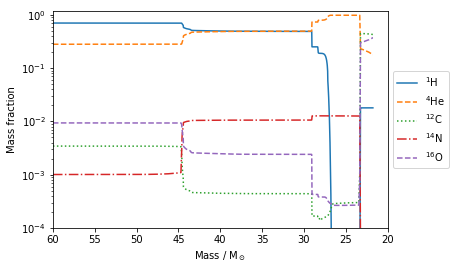

In [7]:
# compute surface hydrogen abundance
surface_h1 = 1.0 - log_60M.history.surface_he4 - log_60M.history.surface_c12 - log_60M.history.surface_n14 - log_60M.history.surface_o16
z = surface_h1[0]-0.7 # initial mass fraction of all elements heavier than oxygen
surface_h1 = surface_h1-z

# plot abundances
plt.plot(log_60M.history.star_mass, surface_h1, ls='-', label=r'$^{1}$H')
plt.plot(log_60M.history.star_mass, log_60M.history.surface_he4, ls='--', label=r'$^{4}$He')
plt.plot(log_60M.history.star_mass, log_60M.history.surface_c12, ls=':', label=r'$^{12}$C')
plt.plot(log_60M.history.star_mass, log_60M.history.surface_n14, ls='-.', label=r'$^{14}$N')
plt.plot(log_60M.history.star_mass, log_60M.history.surface_o16, ls='--', label=r'$^{16}$O')

plt.xlim(60, 20)
plt.xlabel('Mass / $\mathrm{M}_\odot$')
plt.yscale('log')
plt.ylim(1e-4, 1.2)
plt.ylabel('Mass fraction')

plt.legend(loc='center', bbox_to_anchor=(1.1,0.5))

#### Problem 4: 
1. In the above diagram, the mass of the star indicates the direction of evolution. Where is zero-age and where is end of core-helium burning?
2. In which phases is the star visible as a Wolf-Rayet star and of which type is it? *Hint:* you can add horizontal and vertical lines to the above plot with the commands `plt.hlines(<y-value>, <x-min>, <x-max>)` and `plt.vlines(<x-value>, <y-min>, <y-max>)`, respectively. The color, style and width of the lines are controlled by the key words `color`, `linestyle` and `linewidth`.

## Metallicity dependence of stellar winds

Line-driven winds are caused by atomic transitions of heavy chemical elements such as iron. It is therefore obvious that the strength of winds must sensitively depend on the amount of heavy metals in stars, i.e. the metallicity. The exact scaling is still a matter of debate and power-law scalings such as $\dot{M}\propto Z^{-0.5}$ and $\dot{M}\propto Z^{-0.7}$ seem appropriate.

Why does this matter? Well, we have not spoken yet about how massive stars end their lives, but some stars will simply collapse directly to a black hole at the end of their life without producing a supernova. The black hole mass is then simply given by the remaining stellar mass. Before the metallicity scaling of Vink et al. 2000, 2001 and Vink & de Koter 2005 were applied to the winds of Wolf-Rayet stars, it was thought that the maximum mass of stellar black holes is about $25\,\mathrm{M}_\odot$. In 2010, however, Belczynski et al. showed that when also Wolf-Rayet winds scale with metallicity (they used the Vink & de Koter 2005 scaling of $\dot{M}\propto Z^{-0.86}$), the maximum black-hole mass can be much larger. 

<img src="max-bh-mass.png" alt="Maximum black-hole mass" width="500"/>

Thanks to gravitational wave astronomy and the observed BH-BH mergers, we now know that black holes with more than $25\,\mathrm{M}_\odot$ exist in the Universe. Winds and especially their scaling with metallicity matter!

#### Student-report:
Take your favourite resources (books, internet, etc.), read about the Humphreys-Davidson limit and write a short essay on it for your student report. What is it and how might it be connected to mass-loss from massive stars? In particular, you will encounter so-called luminous-blue-variable (LBV) stars, eruptive and/or pulsational mass loss and the Eddington limit. We have also prepared a txt-file that contains the effective temperatures and luminosities of the limit from the original paper of Humphreys & Davidson 1994 and that you can add to the HR diagram of the $60\,\mathrm{M}_\odot$ model (to load the data, e.g. use `Teff_HD, logL_HD = np.loadtxt('hd-limit.dat', unpack=True)`). Does the $60\,\mathrm{M}_\odot$ model cross the Humphreys-Davidson limit?

A nice representation of the Humphreys-Davidson limit is from Fitzpatrick & Garmany 1990 (the dotted line). Instead of total stellar luminosity, these authors used the absolute bolometric magnitude $M_\mathrm{bol}$.

<img src="HD-limit.png" alt="Humphreys-Davidson limit" width="500"/>

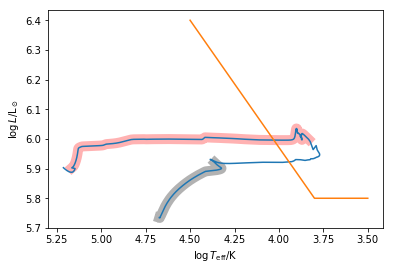

In [16]:
Teff_HD, logL_HD = np.loadtxt('hd-limit.dat', unpack=True)
from math import log10


plt.plot(log_60M.history.log_Teff[ms_mask], log_60M.history.log_L[ms_mask], lw=10, c='k', alpha=0.3)
plt.plot(log_60M.history.log_Teff[he_mask], log_60M.history.log_L[he_mask], lw=10, c='r', alpha=0.3)
plt.plot(log_60M.history.log_Teff, log_60M.history.log_L)
plt.plot(np.log10(Teff_HD), logL_HD)


plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.gca().invert_xaxis()
## Yes it crosses 60